# %B Indicator

FF-19	%B Indicator

This notebook compute the features listed here:  
https://docs.google.com/spreadsheets/d/1Qkh-3fxaNFeh_741QCA10vgCA9-vex1RbzJa81tldwQ/edit#gid=1163800167 

https://school.stockcharts.com/doku.php?id=technical_indicators:bollinger_band_perce
%B quantifies a security's price relative to the upper and lower Bollinger Band. There are six basic relationship levels:  
%B is below 0 when price is below the lower band  
%B equals 0 when price is at the lower band  
%B is between 0 and .50 when price is between the lower and middle band (20-day SMA)  
%B is between .50 and 1 when price is between the upper and middle band (20-day SMA)  
%B equals 1 when price is at the upper band  
%B is above 1 when price is above the upper band  

Calculation  
%B = (Price - Lower Band)/(Upper Band - Lower Band)

More on Bollingerbands
https://www.investopedia.com/terms/b/bollingerbands.asp

https://towardsdatascience.com/trading-strategy-technical-analysis-with-python-ta-lib-3ce9d6ce5614
a strategy with RSI (a momentum indicator) and Bollinger Bands %b (a volatility indicator). High RSI (usually above 70) may indicate a stock is overbought, therefore it is a sell signal. Low RSI (usually below 30) indicates stock is oversold, which means a buy signal. Bollinger Bands tell us most of price action between the two bands. Therefore, if %b is above 1, price will likely go down back within the bands. Hence, it is a sell signal. While if it is lower than 0, it is considered a buy signal. The strategy is a simple voting mechanism. When two indicators think it is time to buy, then it issues buy order to enter. When both indicators think it is time to sell, then it issues sell order to exit.  

From the post above:  
```
Convert Bollinger Bands to %b
def bbp(price):
    up, mid, low = BBANDS(close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
    bbp = (price['AdjClose'] - low) / (up - low)
    return bbp
```  

https://mrjbq7.github.io/ta-lib/func_groups/overlap_studies.html

```
BBANDS - Bollinger Bands
upperband, middleband, lowerband = BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
```


Also volatility_bbp from ta library.

In [6]:
import talib
from talib.abstract import *
import numpy as np
import pandas as pd
import datetime as dt
import os, os.path

# 1. https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
# 2. https://stackoverflow.com/questions/42379818/correct-way-to-set-new-column-in-pandas-dataframe-to-avoid-settingwithcopywarnin
pd.options.mode.chained_assignment = None # Suppress warning

# Load Data Series from Dataset

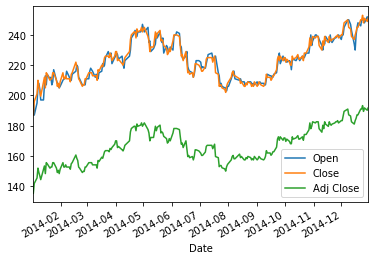

In [7]:
DATA_HOME = os.path.join("..","..","dataset","historical")

symbols = ["ADVANC","BTS"]
data = {}
for s in symbols:
    data[s] = pd.read_csv(os.path.join(DATA_HOME,"%s.csv" % s), index_col=0)

df = data["ADVANC"]
df.index = pd.to_datetime(df.index)

period_start='2014-01-01'
period_end='2014-12-31'

daily = df[period_start:period_end]
daily[['Open','Close','Adj Close']].plot()

In [15]:

from ta import add_all_ta_features
from ta.utils import dropna

inputs = {
    'open': daily["Open"],
    'high': daily["High"],
    'low': daily["Low"],
    'close': daily["Close"],
    'volume': daily["Volume"]
}
# Note the use of Close instead of Adj Close.

up, mid, low = BBANDS(inputs, timeperiod=20, nbdevup=float(2), nbdevdn=float(2), matype=0)
bbp = (daily['Close'] - low) / (up - low)
daily = add_all_ta_features(daily, open="Open", high="High", low="Low", close="Close", volume="Volume")

daily.loc[:,("%b")] = bbp.tolist()
daily.tail()



,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,%b
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-24,253.0,249.0,250.0,253.0,3076400.0,193.273026,-5.005559e+06,213623400.0,0.222698,6.340093e+06,...,8.317647,243.129319,2.016129,4.009376,11.660023,-7.650647,1.200000,1.192857,35.294118,1.018321
2014-12-25,252.0,246.0,251.0,248.0,1773800.0,189.453384,-5.596826e+06,211849600.0,0.194908,4.167365e+06,...,9.008824,243.239696,-0.800000,-2.532403,8.821538,-11.353940,-1.976285,-1.996074,32.620321,0.724656
2014-12-26,251.0,246.0,248.0,251.0,2452700.0,191.745163,-3.144126e+06,214302300.0,0.206448,4.623184e+06,...,9.029412,244.149666,2.448980,-7.243628,5.608505,-12.852132,1.209677,1.202419,34.224599,0.846391
2014-12-29,253.0,248.0,252.0,249.0,2282500.0,190.217331,-4.513626e+06,212019800.0,0.188726,3.310587e+06,...,9.173529,244.718414,2.049180,-11.512135,2.184377,-13.696512,-0.796813,-0.800004,33.155080,0.717593
2014-12-30,252.0,247.0,249.0,251.0,2302600.0,191.745163,-3.132066e+06,214322400.0,0.217800,3.495531e+06,...,8.258824,245.400251,5.020921,-15.084623,-1.269423,-13.815199,0.803213,0.800004,34.224599,0.795585


# Plot of %b on the original time-series

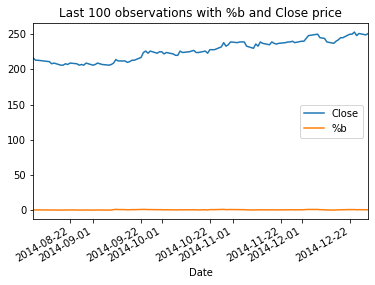

In [16]:
daily[['Close','%b']][-100:].plot(title="Last 100 observations with %b and Close price")

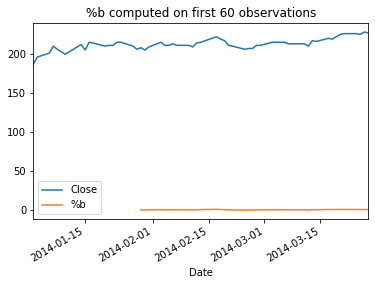

In [17]:
daily[['Close','%b']][:60].plot(title="%b computed on first 60 observations")

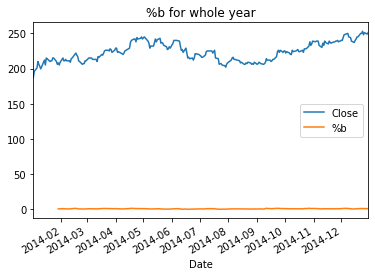

In [18]:
daily[['Close','%b']].plot(title="%b for whole year")

In [5]:
daily.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi', 'volume_mfi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volume_vwap',
       'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
     

In [ ]:
daily[['volume_vwap']].dropna().plot()

In [ ]:
daily[['volatility_atr']].dropna().plot()

In [ ]:
daily[['Close']].dropna().plot()

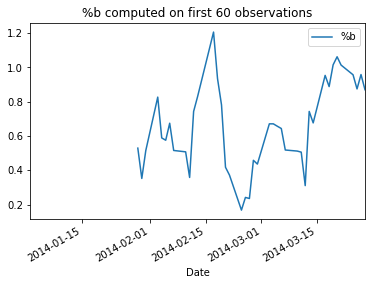

In [22]:
daily[['%b']][:60].plot(title="%b computed on first 60 observations")

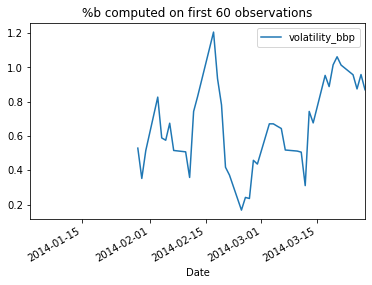

In [23]:
daily[['volatility_bbp']][:60].plot(title="%b (volatility_bbp) computed on first 60 observations")